In [2]:
import tensorflow as tf
import pickle 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os

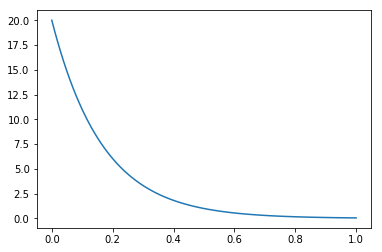

In [4]:
p=np.linspace(0,1,100)
def eta(p,eta_plus):
    return np.exp(-2*np.log(eta_plus)*(p-1/2))
plt.plot(p,eta(p,20))
plt.show()

In [5]:
os.getcwd()

'/is/ei/azadaianchuk/RPROP/code'

In [5]:
name = "tflogs/cifar10_3c3d/cifar10_3c3d__RPROP__bs_32__delta_0_1E-04__delta_min_1E-09__delta_max_1E-03__eta_minus_0.83__eta_plus_1.2__N_40000__MNS_True__UME_False__seed_42"

In [6]:
# TO DO show legend

In [7]:
from decimal import *
str(0.6543)
delta_0s=["1E-02","1E-04","1E-05","5E-03","5E-04","5E-05"]

In [9]:
def get_scalar_summary(path, tag):
    for file in os.listdir(path):
        l=[]
        event_file_path=os.path.join(path, file)
        for e in tf.train.summary_iterator(event_file_path):
            for v in e.summary.value:
                if v.tag == tag:
                    l.append(v.simple_value)
    return l

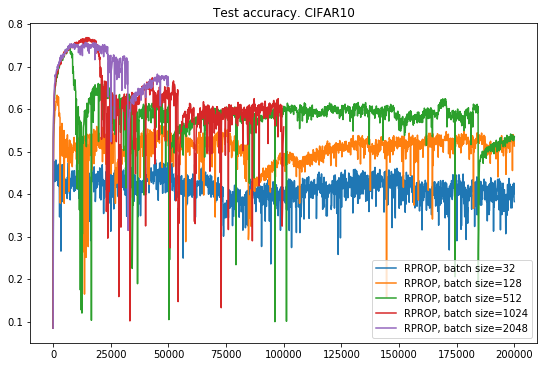

In [61]:
model_name ="cifar10_3c3d"
batch_sizes = [32, 128, 512, 1024, 2048]
Ns={32:200000,128:200000,512:200000,1024:100000,2048:50000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
fig=plt.figure(figsize=(20,20))
#add accuracy 
ax=fig.add_subplot(3,2,1)
ax.set_title("Test accuracy. CIFAR10")
tag = 'checkpoint_test_acc'

path_rprop = "../tflogs_for_report/tflogs_for_report2/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-09__delta_max_5E-03__"\
             "eta_minus_0.33__eta_plus_3.0__N_{1}__MNS_True__UME_False__seed_42"
    
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts[bs],l,label="RPROP, batch size=" + str(bs))
    
ax.legend()
fig.savefig("../report/fig6_RPROP.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

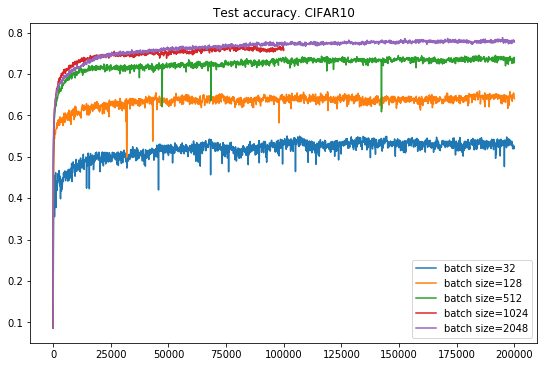

In [22]:
model_name ="cifar10_3c3d"
batch_sizes = [32, 128, 512, 1024, 2048]
# batch_sizes = [128]
Ns={32:200000,128:200000,512:200000,1024:100000,2048:200000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
fig=plt.figure(figsize=(20,20))
#add accuracy 
ax=fig.add_subplot(3,2,1)
ax.set_title("Test accuracy. CIFAR10")
tag = 'checkpoint_test_acc'

path_rprop = "../tflogs_for_report/tflogs_for_report6/"+model_name+"/"+model_name+"__ProbRPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-09__delta_max_5E-02__p_min_0.25__"\
            "eta_minus_0.33__eta_plus_3.0__eta_type_interval__N_{1}__UME_False__SOFT_True__seed_50"
    
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts[bs],l,label="batch size=" + str(bs))
# plt.xlim(0,50000)
ax.legend()
fig.savefig("../report/fig7_int.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

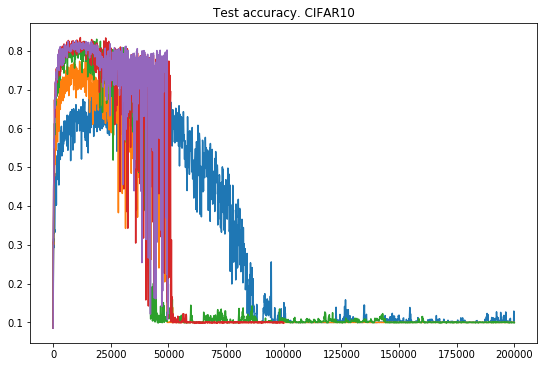

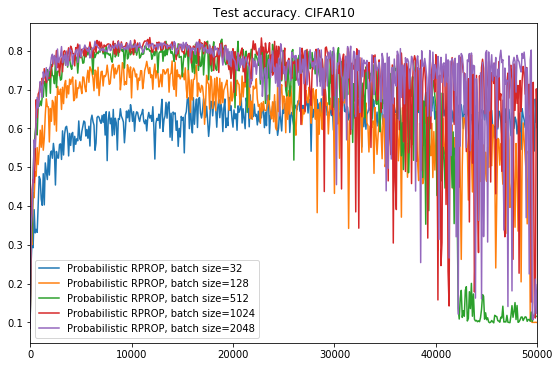

In [18]:
model_name ="cifar10_3c3d"
batch_sizes = [32, 128, 512, 1024, 2048]
# batch_sizes = [128]
Ns={32:200000,128:200000,512:200000,1024:100000,2048:50000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
fig=plt.figure(figsize=(20,20))
#add accuracy 
ax=fig.add_subplot(3,2,1)
ax.set_title("Test accuracy. CIFAR10")
tag = 'checkpoint_test_acc'

path_rprop = "../tflogs_for_report/tflogs_for_report5/"+model_name+"/"+model_name+"__ProbRPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-09__delta_max_5E-03__p_min_0.25__"\
            "eta_minus_0.33__eta_plus_3.0__eta_type_linear__N_{1}__UME_False__SOFT_True__seed_42"
    
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts[bs],l,label="Probabilistic RPROP, batch size=" + str(bs))
plt.xlim(0,50000)
ax.legend()
fig.savefig("../report/fig7_lin.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [ ]:
cifar10_3c3d__ProbRPROP__bs_128__delta_0_5E-04__delta_min_1E-09__delta_max_5E-03__p_min_0.25__eta_minus_0.33__eta_plus_3.0__eta_type_linear__N_200000__UME_False__SOFT_True__seed_42

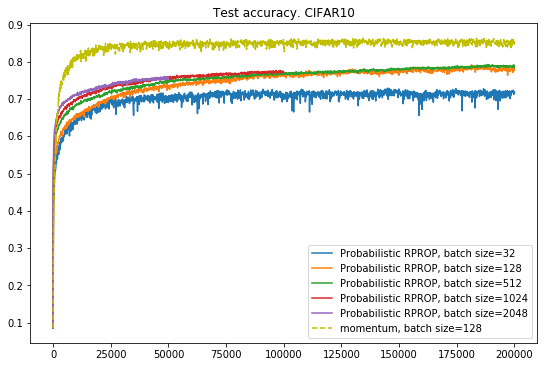

In [34]:
model_name ="cifar10_3c3d"
batch_sizes = [32, 128, 512, 1024, 2048]
Ns={32:200000,128:200000,512:200000,1024:100000,2048:50000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
fig=plt.figure(figsize=(20,20))
#add accuracy 
ax=fig.add_subplot(3,2,1)
ax.set_title("Test accuracy. CIFAR10")
tag = 'checkpoint_test_acc'

path_rprop = "../tflogs_for_report/tflogs_for_report2/"+model_name+"/"+model_name+"__ProbRPROP__bs_{0}"\
             "__delta_0_5E-04__delta_min_1E-09__delta_max_5E-03__p_min_0.25__"\
            "eta_minus_0.5__eta_plus_3.0__eta_type_exponential__N_{1}__UME_False__SOFT_True__seed_42"
    
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts[bs],l,label="Probabilistic RPROP, batch size=" + str(bs))
path="../tflogs_for_report/tflogs_for_report4/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_5E-04__seed_42/"
l = get_scalar_summary(path, tag)
line=ax.plot(range(0,200000+1,every) ,l, '--y',   label="momentum, batch size=128" ,  )    
ax.legend()
fig.savefig("../report/fig6_exp.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [33]:
path="../tflogs_for_report/tflogs_for_report4/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_5E-04__seed_42/"
l = get_scalar_summary(path, tag)
line=ax.plot(range(0,200000+1,every) ,l, '--y',   label="momentum, batch size=128" ,  )    
ax.legend()
fig.savefig("../report/fig6_exp.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [16]:
model_name ="cifar10_3c3d"
batch_sizes = [128]
Ns={128:200000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(3,2,1)
ax.set_title("Test accuracy. CIFAR10")
tag = 'checkpoint_test_acc'

path_rprop = "../tflogs_for_report/tflogs_for_report3/"+model_name+"/"+model_name+"__ProbRPROP__bs_128"\
             "__delta_0_{0}__delta_min_1E-09__delta_max_5E-02__p_min_0.25__eta_minus_0.33__eta_plus_3.0__eta_type_interval__N_200000__UME_False__SOFT_True__seed_42/"
for delta_0 in delta_0s:
    path = path_rprop.format(delta_0)
    l = get_scalar_summary(path, tag)
    ax.plot(l,label="ProbRPROP, delta_0=" + delta_0)
    ax.legend()
fig.savefig("../report/fig8_diff_delta_0_int.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

DataLossError: truncated record at 673400737

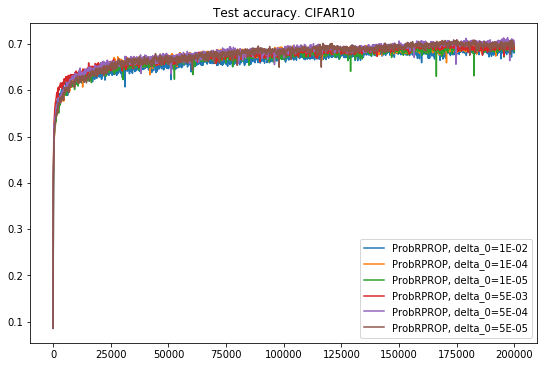

In [51]:
model_name ="cifar10_3c3d"
batch_sizes = [128]
Ns={128:200000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(3,2,1)
ax.set_title("Test accuracy. CIFAR10")
tag = 'checkpoint_test_acc'

path_rprop = "../tflogs_for_report/tflogs_for_report3/"+model_name+"/"+model_name+"__ProbRPROP__bs_128"\
             "__delta_0_{0}__delta_min_1E-09__delta_max_5E-02__p_min_0.25__eta_minus_0.5__eta_plus_2.0__eta_type_exponential__N_200000__UME_False__SOFT_True__seed_42/"
for delta_0 in delta_0s:
    path = path_rprop.format(delta_0)
    l = get_scalar_summary(path, tag)
    ax.plot(ts[128],l,label="ProbRPROP, delta_0=" + delta_0)
    ax.legend()
fig.savefig("../report/fig5_diff_delta_0.pdf",  transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

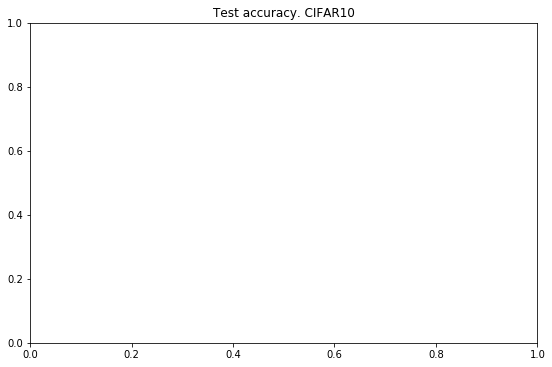

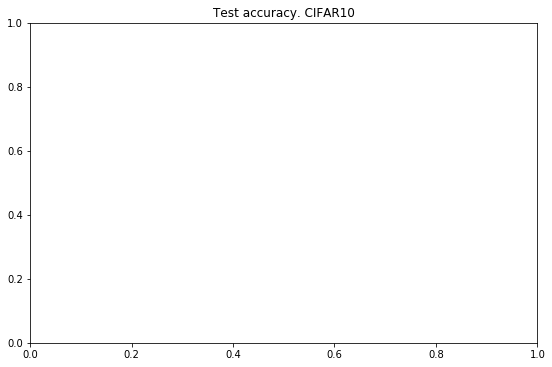

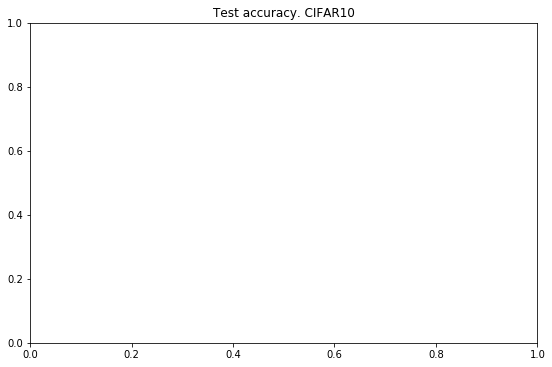

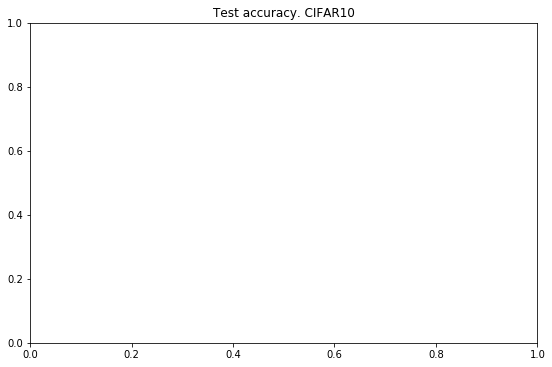

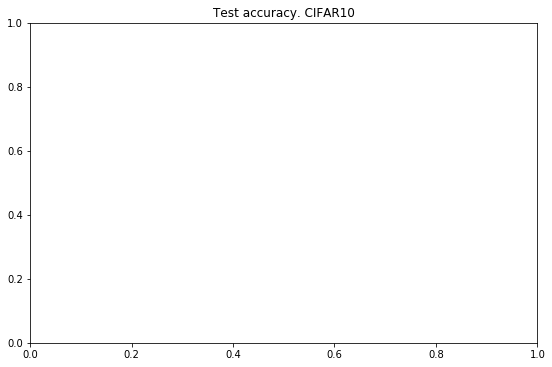

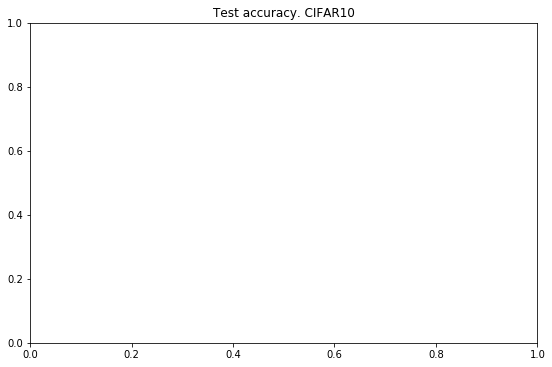

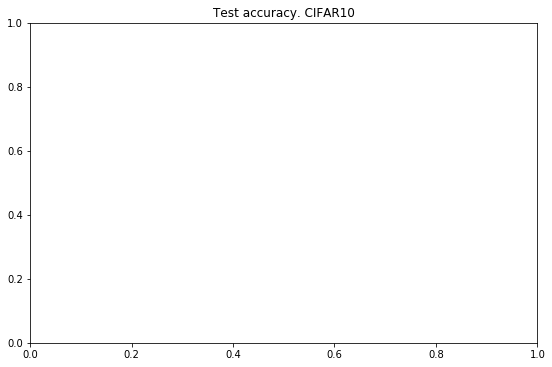

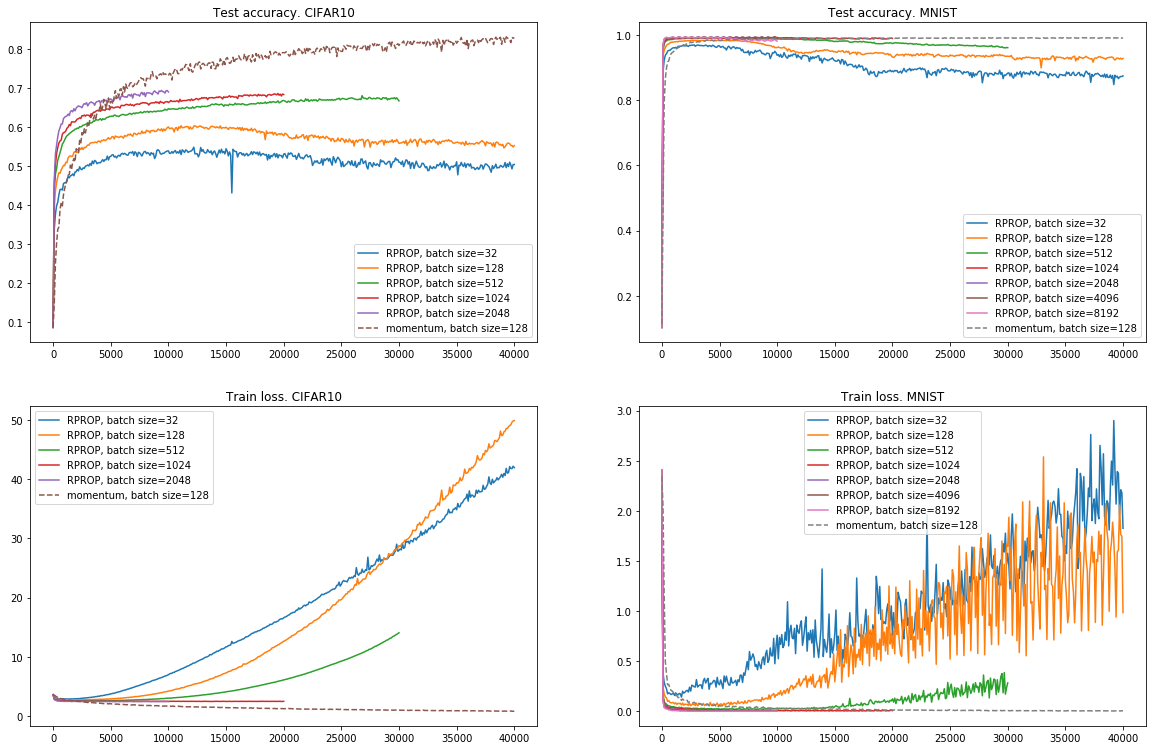

In [27]:
model_name ="cifar10_3c3d"
batch_sizes = [32, 128, 512, 1024, 2048]
Ns={32:40000,128:40000,512:30000,1024:20000,2048:10000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
fig=plt.figure(figsize=(20,20))
#add accuracy 
ax=fig.add_subplot(3,2,1)
ax.set_title("Test accuracy. CIFAR10")
tag = 'checkpoint_test_acc'

path_rprop = "tflogs_for_report/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_1E-04__delta_min_1E-09__delta_max_1E-03__eta_minus_0.83__eta_plus_1.2__N_{1}"\
             "__MNS_True__UME_False__seed_42/"
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts[bs],l,label="RPROP, batch size=" + str(bs))
    
path="tflogs_for_report/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_1E-04__seed_42/"
l = get_scalar_summary(path, tag)
line=ax.plot(ts[128],l, '--',  label="momentum, batch size=128" )
ax.legend()
#add loss
# Train and test loss start increasing at some point. Sometimes the increase is so large that it reduce the test accuracy.
ax=fig.add_subplot(3,2,3)
ax.set_title("Train loss. CIFAR10")
tag="checkpoint_train_loss"
for bs in batch_sizes:
    path = path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    line=ax.plot(ts[bs],l,  label="RPROP, batch size=" + str(bs))
path="tflogs_for_report/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_1E-04__seed_42/"
l = get_scalar_summary(path, tag)
line=ax.plot(ts[128],l,'--',   label="momentum, batch size=128")
ax.legend()

model_name ="mnist_2c2d"
batch_sizes = [32, 128, 512, 1024, 2048,4096,8192]
Ns={32:40000,128:40000,512:30000,1024:20000,2048:10000, 4096:10000, 8192:10000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
#add accuracy 
ax=fig.add_subplot(3,2,2)
ax.set_title("Test accuracy. MNIST")
tag = 'checkpoint_test_acc'

path_rprop = "tflogs_for_report/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_1E-04__delta_min_1E-09__delta_max_1E-03__eta_minus_0.83__eta_plus_1.2__N_{1}"\
             "__MNS_True__UME_False__seed_42/"
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts[bs],l,label="RPROP, batch size=" + str(bs))
    
path="tflogs_for_report/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_1E-04__seed_43/"
l = get_scalar_summary(path, tag)
line=ax.plot(ts[128],l, '--',  label="momentum, batch size=128" )
ax.legend()

# Train and test loss start increasing at some point. Sometimes the increase is so large that it reduce the test accuracy.
ax=fig.add_subplot(3,2,4)
ax.set_title("Train loss. MNIST")
tag="checkpoint_train_loss"
for bs in batch_sizes:
    path = path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    line=ax.plot(ts[bs],l,  label="RPROP, batch size=" + str(bs))
path="tflogs_for_report/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_1E-04__seed_43/"
l = get_scalar_summary(path, tag)
line=ax.plot(ts[128],l,'--',   label="momentum, batch size=128")
ax.legend()
plt.show()

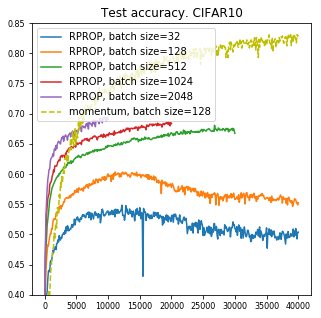

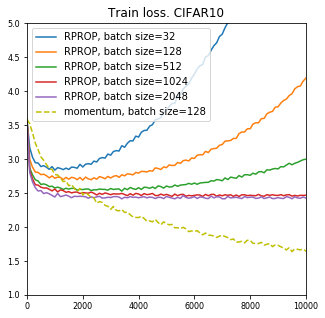

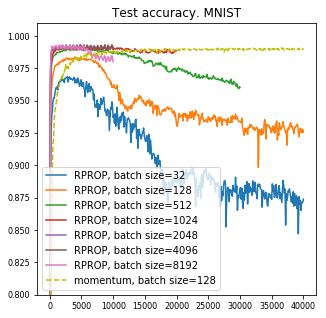

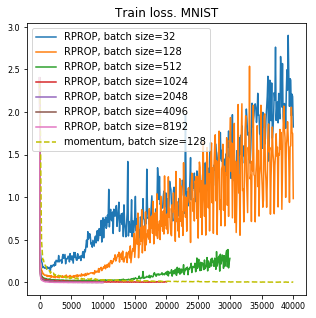

In [28]:
model_name ="cifar10_3c3d"
batch_sizes = [32, 128, 512, 1024, 2048]
Ns={32:40000,128:40000,512:30000,1024:20000,2048:10000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
fig=plt.figure(figsize=(5,5))
#add accuracy 
ax=fig.add_subplot(1,1,1)
ax.set_title("Test accuracy. CIFAR10")
tag = 'checkpoint_test_acc'

path_rprop = "tflogs_for_report/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_1E-04__delta_min_1E-09__delta_max_1E-03__eta_minus_0.83__eta_plus_1.2__N_{1}"\
             "__MNS_True__UME_False__seed_42/"
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts[bs],l,label="RPROP, batch size=" + str(bs))
ax.tick_params(labelsize=8)   
path="tflogs_for_report/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_1E-04__seed_42/"
l = get_scalar_summary(path, tag)
line=ax.plot(ts[128],l, '--y',   label="momentum, batch size=128" ,  )
ax.legend()
plt.ylim(0.4,0.85)
fig.savefig("../report/fig1_cifar10_acc.pdf")

#add loss
# Train and test loss start increasing at some point. Sometimes the increase is so large that it reduce the test accuracy.
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_title("Train loss. CIFAR10")
tag="checkpoint_train_loss"
for bs in batch_sizes:
    path = path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    line=ax.plot(ts[bs],l,  label="RPROP, batch size=" + str(bs))
path="tflogs_for_report/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_1E-04__seed_42/"
l = get_scalar_summary(path, tag)
line=ax.plot(ts[128],l,'--y',   label="momentum, batch size=128")
ax.legend()
ax.set_ylim([1,5])
ax.set_xlim([0,10000])
ax.tick_params(labelsize=8)
fig.savefig("../report/fig1_cifar10_loss.pdf")

model_name ="mnist_2c2d"
batch_sizes = [32, 128, 512, 1024, 2048,4096,8192]
Ns={32:40000,128:40000,512:30000,1024:20000,2048:10000, 4096:10000, 8192:10000}
every=100
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
#add accuracy 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.set_title("Test accuracy. MNIST")
tag = 'checkpoint_test_acc'

path_rprop = "tflogs_for_report/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_1E-04__delta_min_1E-09__delta_max_1E-03__eta_minus_0.83__eta_plus_1.2__N_{1}"\
             "__MNS_True__UME_False__seed_42/"
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts[bs],l,label="RPROP, batch size=" + str(bs))
    
path="tflogs_for_report/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_1E-04__seed_43/"
l = get_scalar_summary(path, tag)
line=ax.plot(ts[128],l, '--y',   label="momentum, batch size=128" )
ax.legend()
ax.tick_params(labelsize=8)
plt.ylim(0.8,1.01)
fig.savefig("../report/fig1_mnist_acc.pdf")
# Train and test loss start increasing at some point. Sometimes the increase is so large that it reduce the test accuracy.
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_title("Train loss. MNIST")
tag="checkpoint_train_loss"
for bs in batch_sizes:
    path = path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    line=ax.plot(ts[bs],l,  label="RPROP, batch size=" + str(bs))
path="tflogs_for_report/"+model_name+"/"+model_name+"__momentum__bs_128__mu_9.9E-01__lr_1E-04__seed_43/"
l = get_scalar_summary(path, tag)
line=ax.plot(ts[128],l,'--y',   label="momentum, batch size=128")
ax.legend()
ax.tick_params(labelsize=8)
fig.savefig("../report/fig1_mnist_loss.pdf")
plt.show()

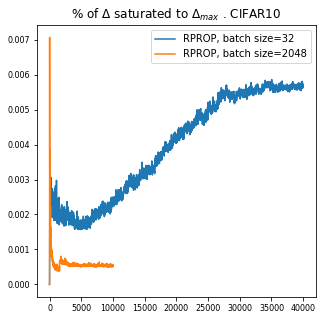

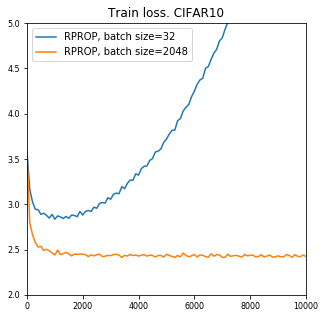

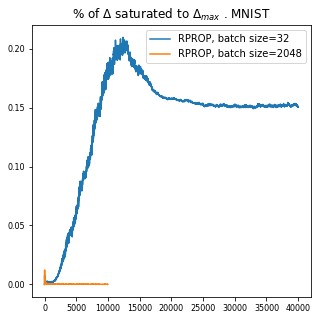

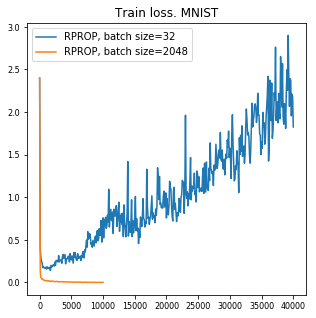

In [16]:
model_name ="cifar10_3c3d"
batch_sizes = [32, 2048]
Ns={32:40000,128:40000,512:30000,1024:20000,2048:10000}
every_fast=10
every=100
ts_max = {bs: range(0,Ns[bs],every_fast) for bs in batch_sizes}
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
fig=plt.figure(figsize=(5,5))
#add accuracy 
ax=fig.add_subplot(1,1,1)
ax.set_title("% of $\Delta$ saturated to $\Delta_{max}$ . CIFAR10")
tag="summaries/per_iteration/max"

path_rprop = "tflogs_for_report/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_1E-04__delta_min_1E-09__delta_max_1E-03__eta_minus_0.83__eta_plus_1.2__N_{1}"\
             "__MNS_True__UME_False__seed_42/"
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts_max[bs],l,label="RPROP, batch size=" + str(bs))
ax.tick_params(labelsize=8)   
ax.legend()
fig.savefig("../report/fig2_cifar10_max.pdf")

#add loss
# Train and test loss start increasing at some point. Sometimes the increase is so large that it reduce the test accuracy.
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_title("Train loss. CIFAR10")
tag="checkpoint_train_loss"
for bs in batch_sizes:
    path = path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    line=ax.plot(ts[bs],l,  label="RPROP, batch size=" + str(bs))

ax.legend()
ax.set_ylim([2,5])
ax.set_xlim([0,10000])
ax.tick_params(labelsize=8)
fig.savefig("../report/fig2_cifar10_loss.pdf")

model_name ="mnist_2c2d"
#add accuracy 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.set_title("% of $\Delta$ saturated to $\Delta_{max}$ . MNIST")
tag="summaries/per_iteration/max"

path_rprop = "tflogs_for_report/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_1E-04__delta_min_1E-09__delta_max_1E-03__eta_minus_0.83__eta_plus_1.2__N_{1}"\
             "__MNS_True__UME_False__seed_42/"
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts_max[bs],l,label="RPROP, batch size=" + str(bs))
ax.legend()
ax.tick_params(labelsize=8)
fig.savefig("../report/fig2_mnist_max.pdf")
# Train and test loss start increasing at some point. Sometimes the increase is so large that it reduce the test accuracy.
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_title("Train loss. MNIST")
tag="checkpoint_train_loss"
for bs in batch_sizes:
    path = path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    line=ax.plot(ts[bs],l,  label="RPROP, batch size=" + str(bs))

ax.legend()
ax.tick_params(labelsize=8)
fig.savefig("../report/fig2_mnist_loss.pdf")
plt.show()

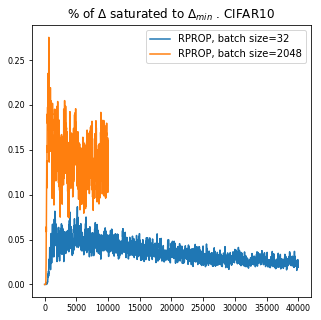

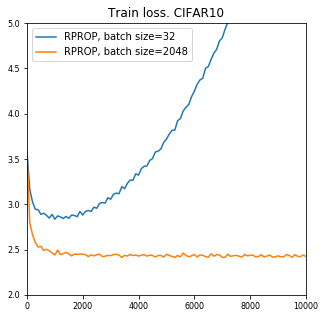

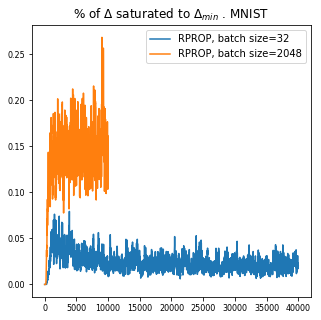

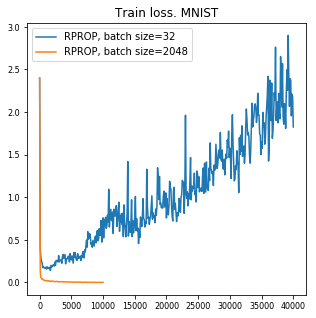

In [11]:
model_name ="cifar10_3c3d"
batch_sizes = [32, 2048]
Ns={32:40000,128:40000,512:30000,1024:20000,2048:10000}
every_fast=10
every=100
ts_max = {bs: range(0,Ns[bs],every_fast) for bs in batch_sizes}
ts = {bs: range(0,Ns[bs]+1,every) for bs in batch_sizes}
fig=plt.figure(figsize=(5,5))
#add accuracy 
ax=fig.add_subplot(1,1,1)
ax.set_title("% of $\Delta$ saturated to $\Delta_{min}$ . CIFAR10")
tag="summaries/per_iteration/min"

path_rprop = "tflogs_for_report/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_1E-04__delta_min_1E-09__delta_max_1E-03__eta_minus_0.83__eta_plus_1.2__N_{1}"\
             "__MNS_True__UME_False__seed_42/"
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts_max[bs],l,label="RPROP, batch size=" + str(bs))
    
ax.tick_params(labelsize=8)   
ax.legend()
fig.savefig("../report/fig3_cifar10_min.pdf")

#add loss
# Train and test loss start increasing at some point. Sometimes the increase is so large that it reduce the test accuracy.
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_title("Train loss. CIFAR10")
ax.set_ylim([2,5])
ax.set_xlim([0,10000])
tag="checkpoint_train_loss"
for bs in batch_sizes:
    path = path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    line=ax.plot(ts[bs],l,  label="RPROP, batch size=" + str(bs))

ax.legend()
ax.tick_params(labelsize=8)
fig.savefig("../report/fig3_cifar10_loss.pdf")

model_name ="mnist_2c2d"
#add accuracy 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.set_title("% of $\Delta$ saturated to $\Delta_{min}$ . MNIST")
tag="summaries/per_iteration/min"

path_rprop = "tflogs_for_report/"+model_name+"/"+model_name+"__RPROP__bs_{0}"\
             "__delta_0_1E-04__delta_min_1E-09__delta_max_1E-03__eta_minus_0.83__eta_plus_1.2__N_{1}"\
             "__MNS_True__UME_False__seed_42/"
for bs in batch_sizes:
    path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    ax.plot(ts_max[bs],l,label="RPROP, batch size=" + str(bs))
ax.legend()
ax.tick_params(labelsize=8)
fig.savefig("../report/fig3_mnist_min.pdf")
# Train and test loss start increasing at some point. Sometimes the increase is so large that it reduce the test accuracy.
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_title("Train loss. MNIST")
tag="checkpoint_train_loss"
for bs in batch_sizes:
    path = path = path_rprop.format(bs,Ns[bs])
    l = get_scalar_summary(path, tag)
    line=ax.plot(ts[bs],l,  label="RPROP, batch size=" + str(bs))

ax.legend()
ax.tick_params(labelsize=8)
fig.savefig("../report/fig3_mnist_loss.pdf")
plt.show()

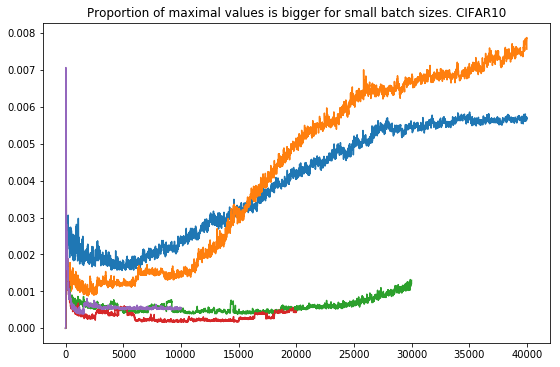

In [63]:
name = "tflogs_for_report/cifar10_3c3d/cifar10_3c3d__RPROP__bs_"
batch_sizes = [32, 128, 512, 1024, 2048]
Ns={32:40000,128:40000,512:30000,1024:20000,2048:10000}
every=10
tag="summaries/per_iteration/max"
ts = {bs: range(0,Ns[bs],every) for bs in batch_sizes}
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(3,2,1)
ax.set_title("Proportion of maximal values is bigger for small batch sizes. CIFAR10")
for bs in batch_sizes:
    path = name+str(bs)+"__delta_0_1E-04__delta_min_1E-09__delta_max_1E-03__eta_minus_0.83__eta_plus_1.2__N_"+str(Ns[bs])+"__MNS_True__UME_False__seed_42/"
    for file in os.listdir(path):
        l=[]
        event_file_path=os.path.join(path, file)
        for e in tf.train.summary_iterator(event_file_path):
            for v in e.summary.value:
                if v.tag == tag:
                    l.append(v.simple_value)
    line=ax.plot(ts[bs],l,  label="RPROP, batch size=" + str(bs))
plt.show()

In [15]:
name ='CNN'
batch_size = 16
delta_0 = 0.0001

dir_to_save="../summary_for_delta2/"+name+"/"
unique_str=dir_to_save+"ProbRPROP"+", delta_0=" + str(delta_0) + ", batch_size=" + str(batch_size)

with open('../summary_for_delta2/CNN/ProbRPROP, delta_0=0.0001, batch_size=16_delta_hists.pickle', 'rb') as f:
    delta_hists = pickle.load(f)

In [5]:
hists_var=[]
for v in range(len(delta_hists[0])):
    dicts={"counts":[],"nbins":[],"range":[]}
    hists_var.append(dicts)

for j,delta_hist_ittr in enumerate(delta_hists):
    
    for i,delta_hist_var in enumerate(delta_hist_ittr):
        hists_var[i]
        count=delta_hist_var["counts"]
        nbins=delta_hist_var["nbins"]
        ranges=delta_hist_var["range"]
        hists_var[i]["counts"].append(count)
        hists_var[i]["nbins"].append(nbins)
        hists_var[i]["range"].append(ranges)

In [6]:
hist_dict = hists_var[0]

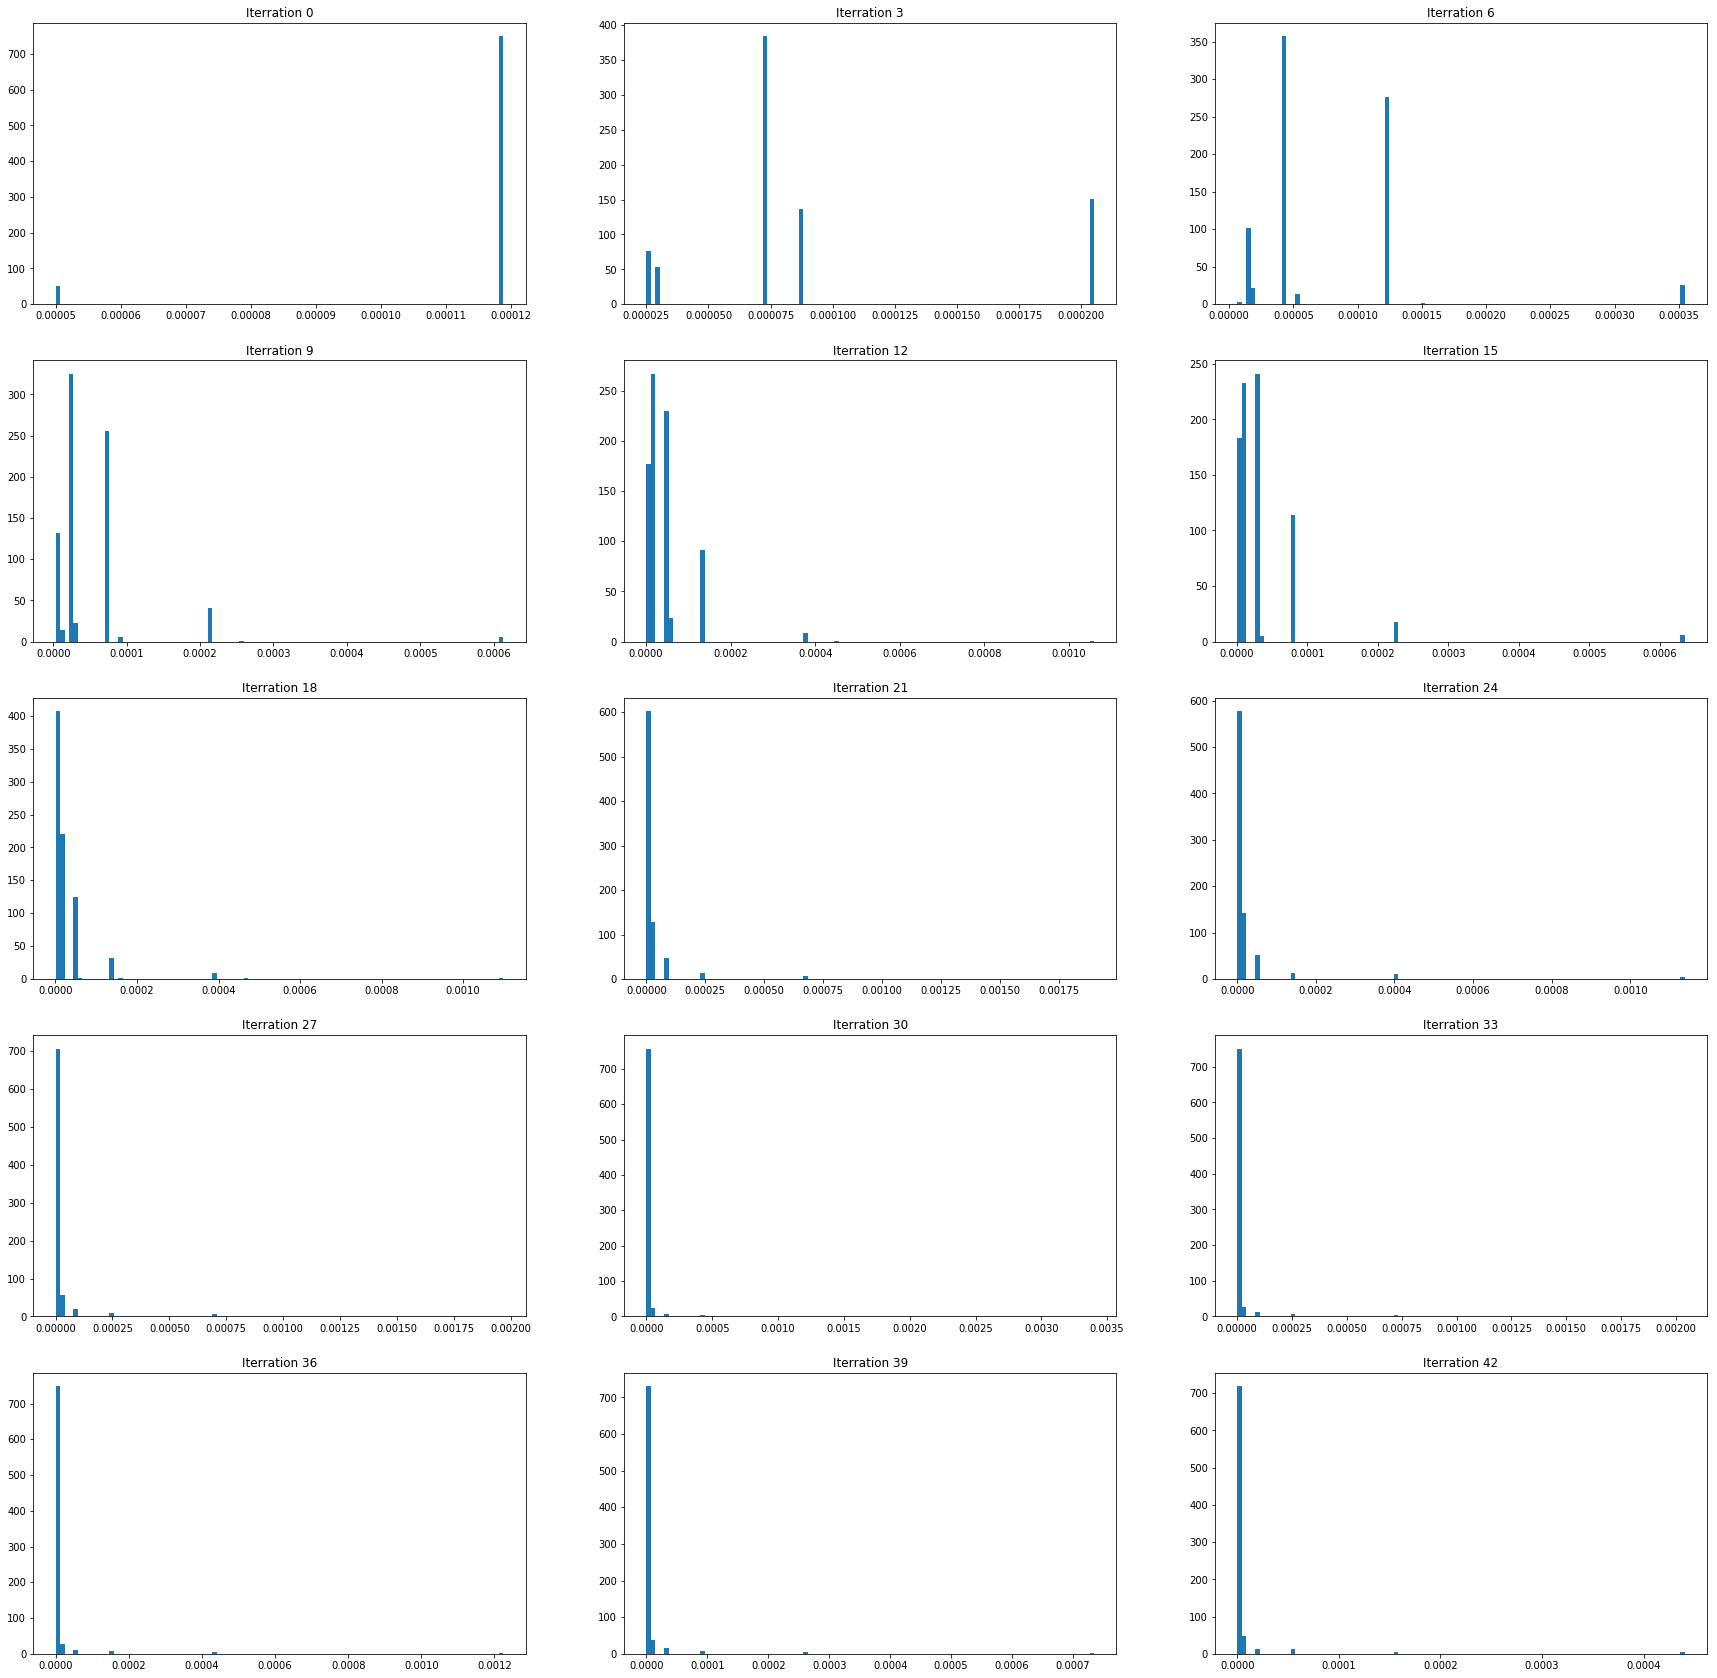

In [8]:
every = 3
fig = plt.figure(figsize=(30,30))
for i in range(15):
    ax=fig.add_subplot(5,3,i+1)
    itter =i*every
    counts=hist_dict["counts"][itter]
    nbins=hist_dict["nbins"][itter]
    min_x,max_x= hist_dict["range"][itter]
    bins = np.linspace(min_x,max_x,nbins+1)
    centroids = (bins[1:] + bins[:-1]) / 2
    counts_, bins_, _ = plt.hist(centroids, bins=len(counts),
                                 weights=counts, range=(min(bins), max(bins)))
    ax.set_title("Iterration "+str(itter))
plt.show()